# Summary of model outputs from 2010, compared with data

For July 2010

Overall I find that the new bay model performs much better on the shelf, but the performance is reduced at the channel entrance.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
import read2df
import os
import comp_tabs
from glob import glob

In [2]:
dstart = '2010-07-01'
dend = '2010-07-31'

# colors for plotting. Data is lightest, bay is medium, shelf is dark
# green for channel, blue for medium distance, pink for far from channel
gshades = ['#A9DE6F', '#76CA19', '#4A7E10']  # green shades: data, bay, shelf
bshades = ['#6FA9DE', '#1976CA', '#061D33']  # blue shades
pshades = ['#DE6FA9', '#CA1976', '#7E104A']  # pink shades
lightcolors = ['#A9DE6F', '#6FA9DE', '#DE6FA9']  # green, blue, pink; for data
medcolors = ['#76CA19', '#1976CA', '#CA1976']  # green, blue, pink; for data
darkcolors = ['#4A7E10', '#061D33', '#7E104A']  # green, blue, pink; for data

In [3]:
# Read in dataframes (previously read in with read2df functions and saved 
# – example code at bottom of comp_tabs.py in comments) and inline here (has to be run on hafen)

# new bay
File = '/rho/raid/dongyu/201007_new/blended201007.nc'
fname = 'calcs/df/new_bay_' + dstart + '_' + dend + '.csv'
if not os.path.exists(fname):
    df = read2df.readblended(dstart, dend, File)
    df.to_csv(fname)
dfnewbay = pd.read_csv(fname, index_col=0, parse_dates=True)

# newest superposition
File = '/rho/raid/dongyu/superposition/blended201007.nc'
fname = 'calcs/df/new_superposition_' + dstart + '_' + dend + '.csv'
if not os.path.exists(fname):
    df = read2df.readblended(dstart, dend, File)
    df.to_csv(fname)
dfnewsuper = pd.read_csv(fname, index_col=0, parse_dates=True)

# Old Bay
fname = 'calcs/df/bay_' + dstart + '_' + dend + '.csv'
if not os.path.exists(fname):
    dfoldbay = read2df.readbay(dstart, dend)
    dfoldbay.to_csv(fname)
dfoldbay = pd.read_csv(fname, index_col=0, parse_dates=True)

# Shelf need to do new since need to use newer model output
fname = 'calcs/df/shelf_' + dstart + '_' + dend + '.csv'
if not os.path.exists(fname):
    dfshelf = read2df.readshelf(dstart, dend)
    dfshelf.to_csv(fname)
dfshelf = pd.read_csv(fname, index_col=0, parse_dates=True)

# Data
dfnoaa = pd.read_csv('calcs/df/data_noaa_' + dstart + '_' + dend + '.csv', index_col=0, parse_dates=True)
dfwind = pd.read_csv('calcs/df/data_wind_' + dstart + '_' + dend + '.csv', index_col=0, parse_dates=True)
dftabs = pd.read_csv('calcs/df/data_tabs_' + dstart + '_' + dend + '.csv', index_col=0, parse_dates=True)

Loading: http://barataria.tamu.edu:8080/thredds/dodsC/2009/GalvCoarse_2009_AVG_0179.nc


sunpy.py:458: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 1; dimension is 4 but corresponding boolean dimension is 3
  xp[self.cells.mask]==0
sunpy.py:459: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 1; dimension is 4 but corresponding boolean dimension is 3
  yp[self.cells.mask]==0


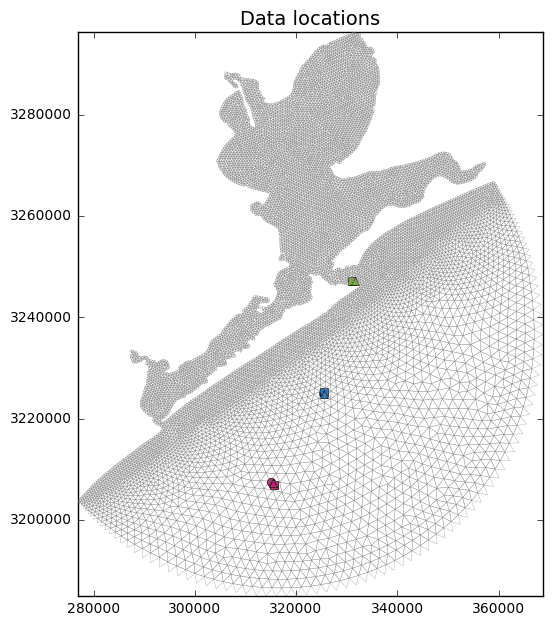

In [6]:
comp_tabs.plot_map(medcolors)

# Near channel entrance

r$^2$ values:
* Old bay model: 0.78
* Shelf model: 0.00
* New bay model: 0.56
* New superposition: 0.78

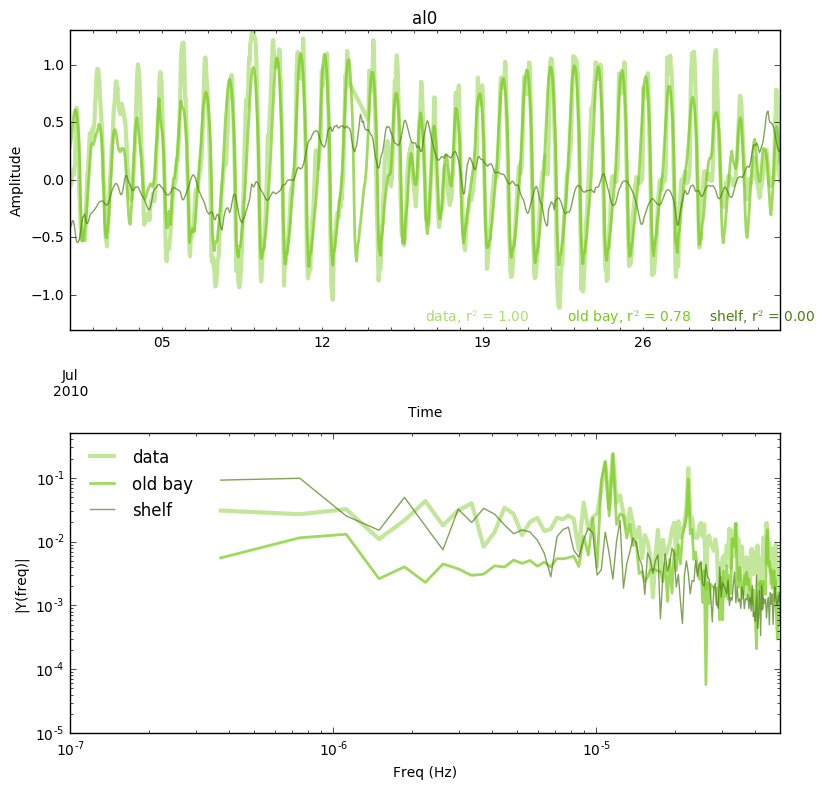

In [8]:
comp_tabs.plot_spectra([dfnoaa, dfoldbay.iloc[:,:4], dfshelf.iloc[:,:4]], 'al', 
                       colors=gshades, lw=[3, 2, 1], legend=['data', 'old bay', 'shelf'],
                      doss=False, dor2=True)

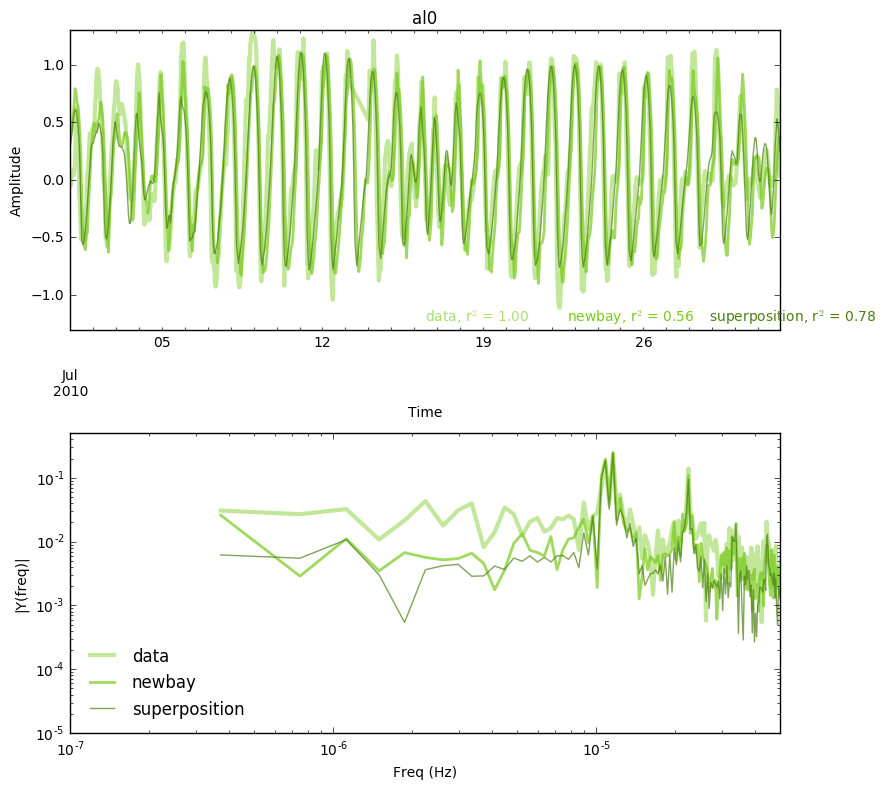

In [14]:
comp_tabs.plot_spectra([dfnoaa[:-1], dfnewbay.iloc[:,:2], dfnewsuper.iloc[:,:2]], 'al', 
                       colors=gshades, lw=[3, 2, 1], legend=['data', 'newbay', 'superposition'],
                      doss=False, dor2=True)

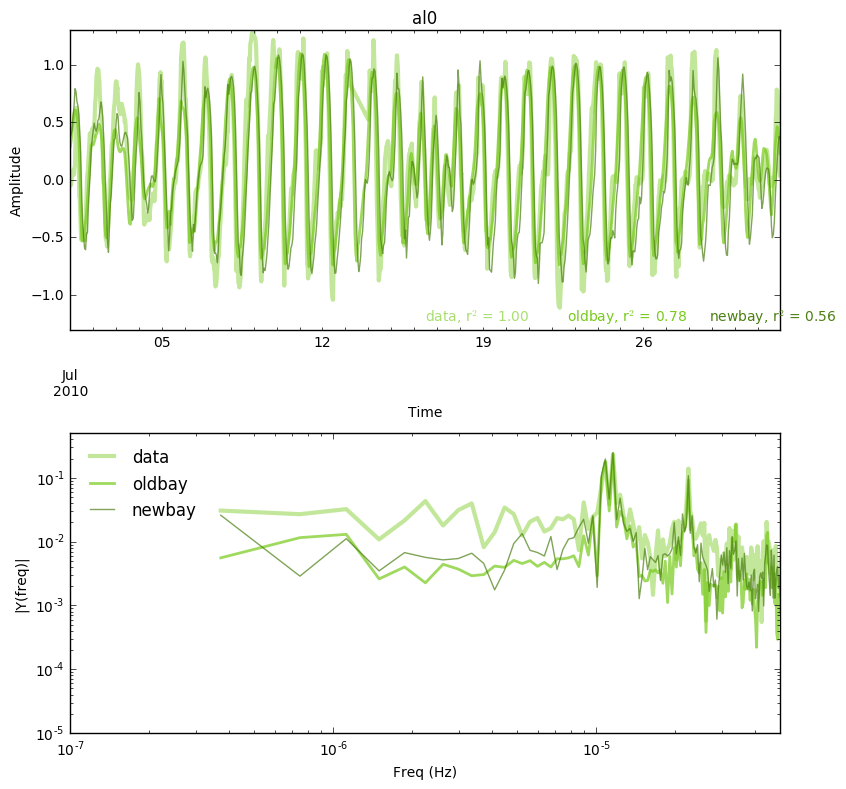

In [27]:
comp_tabs.plot_spectra([dfnoaa[:-1], dfoldbay[:-1].iloc[:,:4], dfnewbay.iloc[:,:2]], 'al', 
                       colors=gshades, lw=[3, 2, 1], legend=['data', 'oldbay', 'newbay'],
                      doss=False, dor2=True)

# Medium distance

r$^2$ values:
* Old bay model: 0.03
* Shelf model: 0.71
* New bay model: 0.76
* New superposition: 0.74

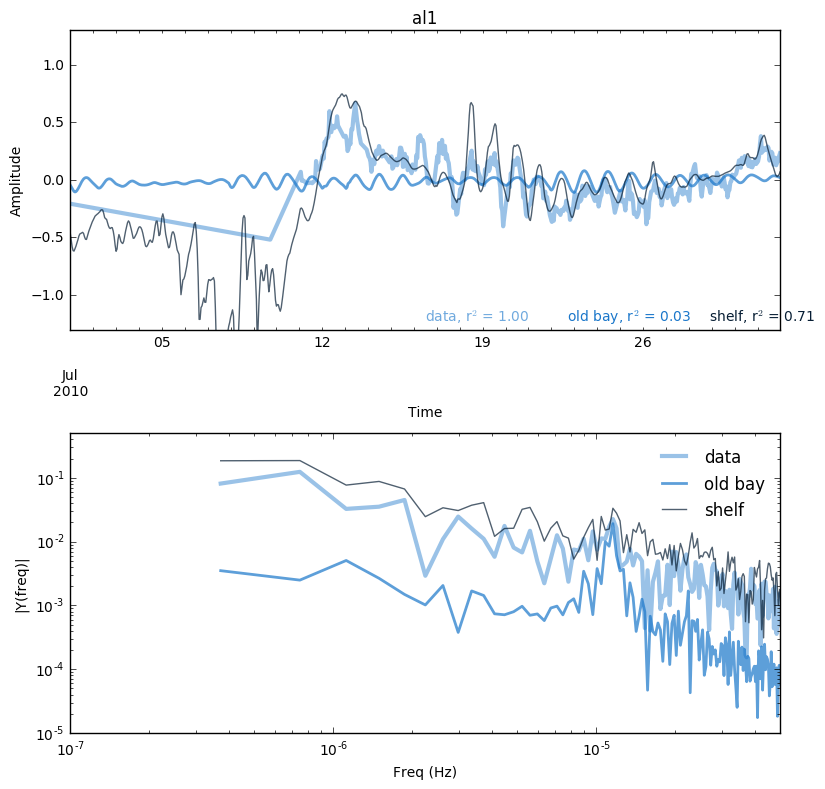

In [18]:
comp_tabs.plot_spectra([dfwind, dfoldbay.iloc[:,4:8], dfshelf.iloc[:,4:8]], 'al', 
                       colors=bshades, lw=[3, 2, 1], legend=['data', 'old bay', 'shelf'],
                      doss=False, dor2=True)

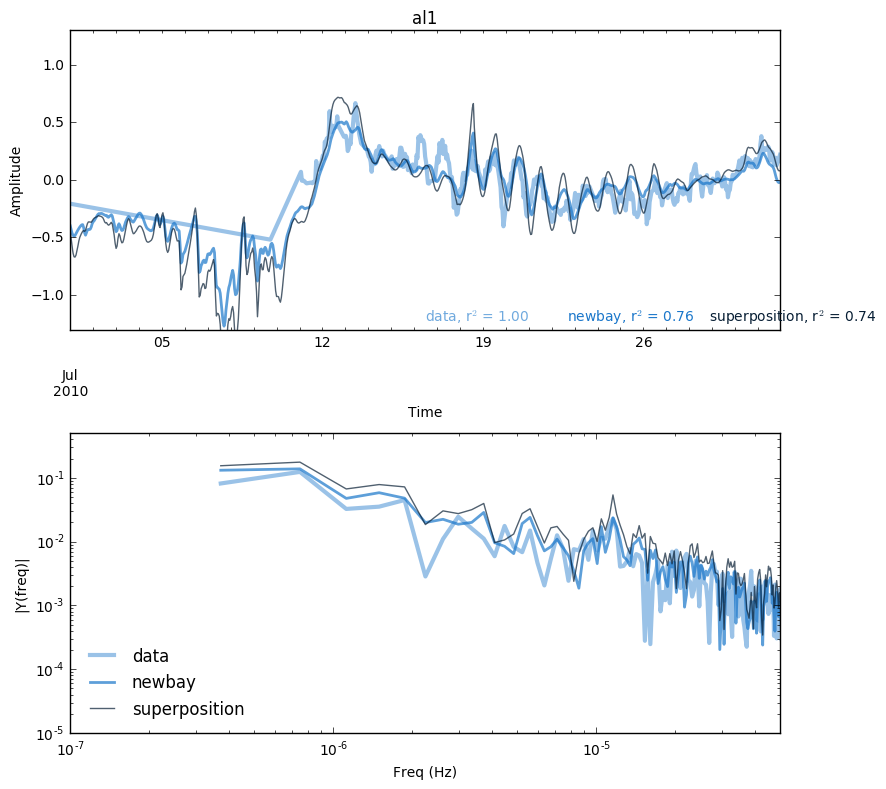

In [19]:
comp_tabs.plot_spectra([dfwind[:-1], dfnewbay.iloc[:,2:4], dfnewsuper.iloc[:,2:4]], 'al', 
                       colors=bshades, lw=[3, 2, 1], legend=['data', 'newbay', 'superposition'],
                      doss=False, dor2=True)

# Far distance

r$^2$ values:
* Old bay model: 0.00
* Shelf model: 0.60
* New bay model: 0.58
* New superposition: 0.57

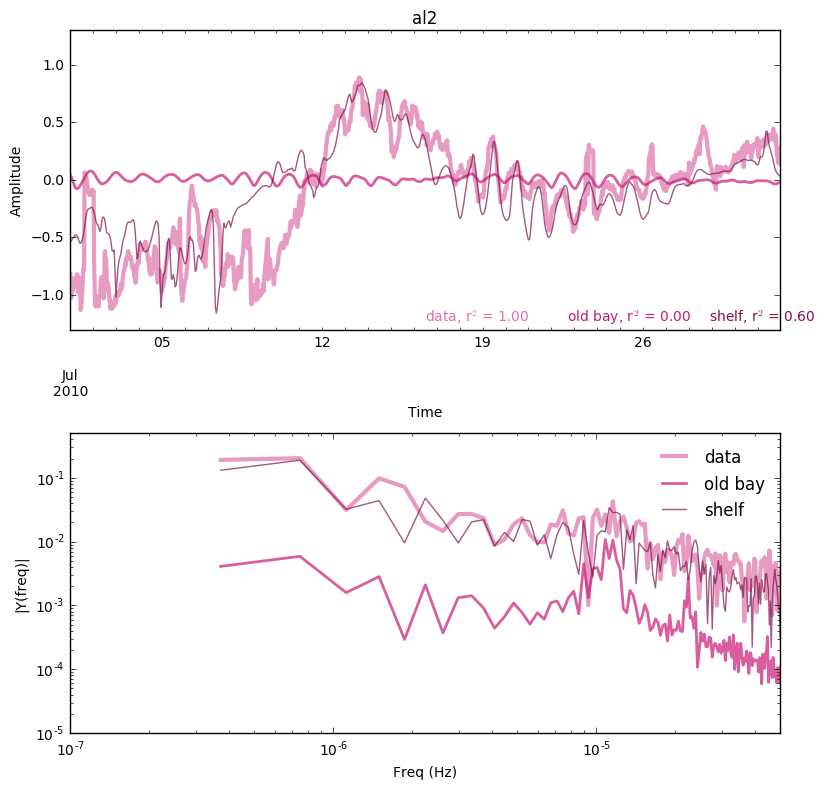

In [20]:
comp_tabs.plot_spectra([dftabs, dfoldbay.iloc[:,8:12], dfshelf.iloc[:,8:12]], 'al', 
                       colors=pshades, lw=[3, 2, 1], legend=['data', 'old bay', 'shelf'],
                      doss=False, dor2=True)

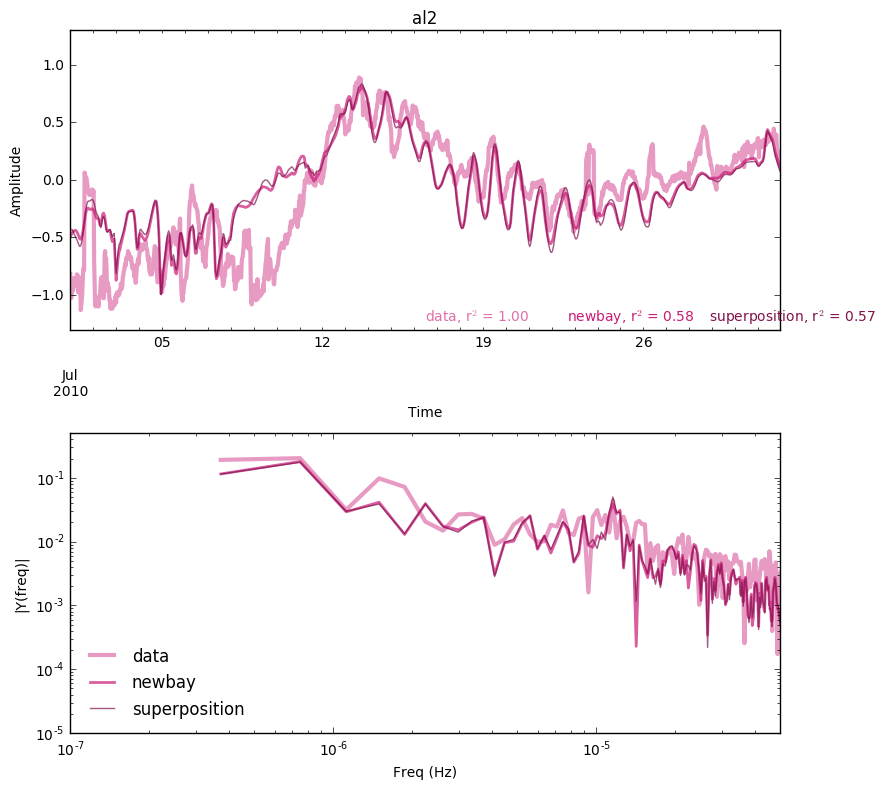

In [25]:
comp_tabs.plot_spectra([dftabs[:-1], dfnewbay.iloc[:,4:], dfnewsuper.iloc[:,4:]], 'al', 
                       colors=pshades, lw=[3, 2, 1], legend=['data', 'newbay', 'superposition'],
                      doss=False, dor2=True)